In [30]:
import pandas as pd
import numpy as np
import scipy as sp

In [1]:
import pbrain

In [13]:
from pbrain import pval


In [4]:
pval??

In [5]:
from importlib import reload

In [152]:
reload(pval)

<module 'pbrain.pval' from '/data/MLcore/pbrain/pbrain/pval.py'>

In [154]:
pwd

'/data/MLcore/pbrain'

In [ ]:
pvals = pval.pval('','prediction_2.csv','temp_output.csv','prediction_2.csv',None)

In [118]:
??pval.pval

In [17]:
df = pd.read_csv('prediction_2.csv')

In [20]:
scores = df['score'].values

In [105]:
test_scores = df['score'].values

In [97]:
test_scores

array([3188334.8, 2787525.2, 2827403.8])

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   3.,
          5.,  14.,  23.,  34.,  78., 127., 134., 197., 239., 311., 325.,
        388., 410., 501., 510., 486., 545., 537., 602., 603., 600., 613.,
        550., 470., 442., 378., 324., 333., 305., 253., 221., 232., 159.,
        145.,  90.,  63.,  72.,  53.,  31.,  28.,  14.,  15.,   7.,   1.,
          2.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1742840.2  , 1789032.338, 1835224.476, 1881416.614, 1927608.752,
        1973800.89 , 2019993.028, 2066185.166, 2112377.304, 2158569.442,
        2204761.58 , 2250953.718, 2297145.856, 2343337.994, 2389530.132,
        2435722.27 , 2481914.408, 2528106.546, 2574298.684, 2620490.822,
        2666682.96 , 27128

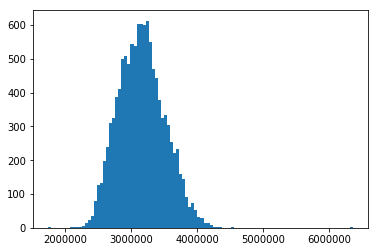

In [24]:
plt.hist(scores, bins=100)

In [23]:
len(scores)

11480

In [33]:
np.diff(np.percentile(scores, [25, 75]))[0]

487447.0

In [38]:
np.logspace(-3, 0, 20)

array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ])

In [53]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm

iqr = sp.stats.iqr(scores)
params = {'bandwidth': np.logspace(-2, 0, 20) * iqr}
grid = GridSearchCV(KernelDensity(), params, cv = 20)
grid.fit(scores.reshape((-1,1)))

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_


best bandwidth: 145081.35811688608


In [93]:
bd = grid.best_estimator_.bandwidth

In [106]:
diffs = np.dot(test_scores.reshape((-1,1)), np.ones((1, len(scores)))) - np.dot(np.ones((len(test_scores), 1)), scores.reshape((1,-1)))

In [107]:
pbs = np.mean(norm.cdf(diffs, loc = 0, scale = bd), 1)

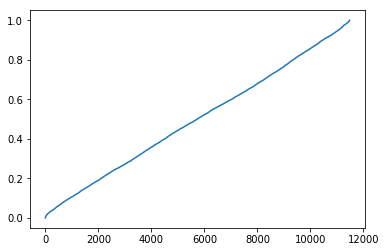

In [108]:
plt.plot(np.sort(pbs))

In [109]:
np.mean(pbs < 0.05)

0.03318815331010453

In [75]:
params['bandwidth']

array([  4874.47      ,   6211.41518956,   7915.05100187,  10085.95150225,
        12852.27570633,  16377.33344194,  20869.22633759,  26593.13309296,
        33886.96429184,  43181.3109385 ,  55024.8643788 ,  70116.80826962,
        89348.09485531, 113854.04229436, 145081.35811689, 184873.54554019,
       235579.73460011, 300193.3629395 , 382528.89326791, 487447.        ])

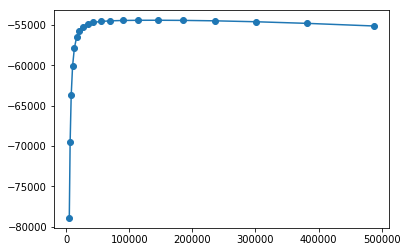

In [76]:
plt.plot(params['bandwidth'], grid.cv_results_['mean_test_score'], marker = "o")

In [71]:
np.max(np.exp(kde.score_samples(xs.reshape((-1,1)))))

1.0342813381436007e-06

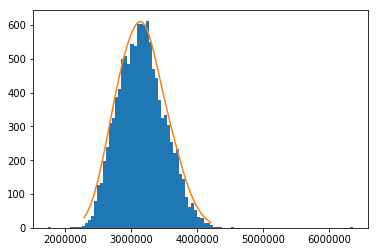

In [124]:
a,b = np.percentile(scores, [0.1, 99.9])
xs = np.linspace(a, b, 100)
plt.hist(scores, bins=100)
plt.plot(xs, 590 * 1e6 * np.exp(kde.score_samples(xs.reshape((-1,1)))))

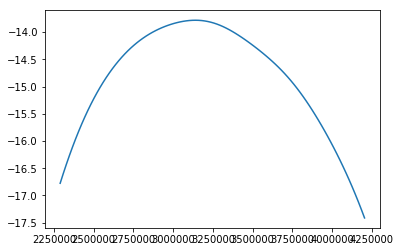

In [125]:
plt.plot(xs, kde.score_samples(xs.reshape((-1,1))))

In [132]:
        # Compute lower tails on reference using KDE with Gaussian kernel
        diffs = np.dot(xs.reshape((-1,1)), np.ones((1, len(scores)))) - np.dot(np.ones((len(xs), 1)), scores.reshape((1,-1))) # a n_test x n_train matrix of differences between xs and training points
        pvals = np.mean(1-norm.cdf(diffs, loc = 0, scale = bd), 1) # the p-values obtained by averaging lower tails of all training points for each test point

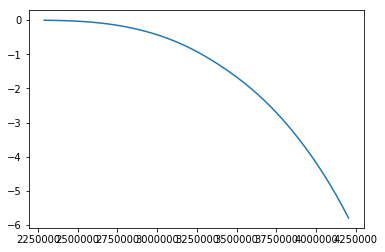

In [133]:
plt.plot(xs, np.log(pvals))

In [56]:
ps = np.exp(kde.score_samples(scores.reshape((-1,1))))

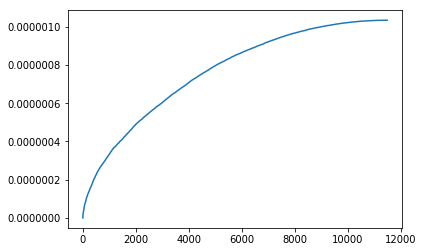

In [58]:
plt.plot(np.sort(ps))

In [137]:
from scipy import interp

In [138]:
??interp

In [139]:
interp(10,xs, np.log(pvals))

-0.00492428121505816

In [147]:

interp(3000000,xs, np.log(pvals))

-0.43064846720007066